# M and V conditioning comparison

### Imports

In [1]:
import numpy as np
from pathlib import Path
import zipfile

from utils.export import *

from models.vehicle_platoon import make_vehicle_platoon
from models.cart_pendulum import make_cart_pendulum

from methods.sweep_horizon_mv import *

### Output saving settings

In [2]:
run_name = "Conditioning"  # used for filenames

ROOT = find_repo_root()
FIG_DIR, RES_DIR = ensure_out_dirs(ROOT)
print("Repo root:", ROOT)

run_id = make_run_id(run_name)
print("Run id:", run_id)

generated_files: list[Path] = []

Repo root: C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples
Run id: Conditioning_20260118_013947_833556


## 1) Cart Pendulum example

### Editable parameters

In [3]:
# --- Type of instance ---
MODEL_NAME = "cart_pendulum"     

# --- Time horizon and grid ---
T_vals = list(np.arange(0.1, 30, 0.8))
dt = 0.001

# --- Physical and model parameters ---
m = 1.0         # Pendulum mass 
M = 5.0         # Cart mass
L = 2.0         # Pendulum length
g = -10.0       # Gravity
delta = 1.0     # Friction coefficient

# --- Weights for the cost function ---
Q = np.eye(4)                         # State weight matrix
R = np.array([[1e-2]])                # Control weight matrix
H = np.diag([0.0, 10, 50.0, 10.0])    # Terminal state weight matrix

# --- Initial and reference states ---
x_ref = np.array([1.0, 0.0, np.pi, 0.0])         # Reference state
x0    = np.array([-1.0, 0.0, np.pi+0.1, 0.0])    # Initial state


# --- V method size ---
m_vals = [5, 15, 50]
                   

# --- Output controls ---
save_plots = False
save_results = False
make_zip = False


### Create instance with those parameters

In [4]:
def make_model_for_T(T: float):
    return make_cart_pendulum(
        T=T, dt=dt,m=m, M=M, L=L, g=g, delta=delta, 
        Q=Q, R=R, H=H, x_ref=x_ref, x0=x0
        )

## 1.1) Run swep

In [5]:
out = sweep_MV_over_T(make_model_for_T, T_vals, m_grids=m_vals)

Done T=0.1
Done T=0.9
Done T=1.7
Done T=2.5
Done T=3.3
Done T=4.1
Done T=4.9
Done T=5.7
Done T=6.5
Done T=7.3
Done T=8.1
Done T=8.9
Done T=9.7
Done T=10.5
Done T=11.3
Done T=12.1
Done T=12.9
Done T=13.7
Done T=14.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.68196e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.0922e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=15.3
Done T=16.1
Done T=16.9


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.64648e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.11493e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=17.7
Done T=18.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.99954e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.02055e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=19.3


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.55469e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.27262e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=20.1
Done T=20.9
Done T=21.7


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.58916e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.37755e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=22.5
Done T=23.3


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.54574e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.01562e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=24.1


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.81677e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.68737e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=24.9
Done T=25.7
Done T=26.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.13698e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.07355e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=27.3
Done T=28.1


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.65458e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.47657e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=28.9
Done T=29.7


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.18647e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


## 1.2) Plots

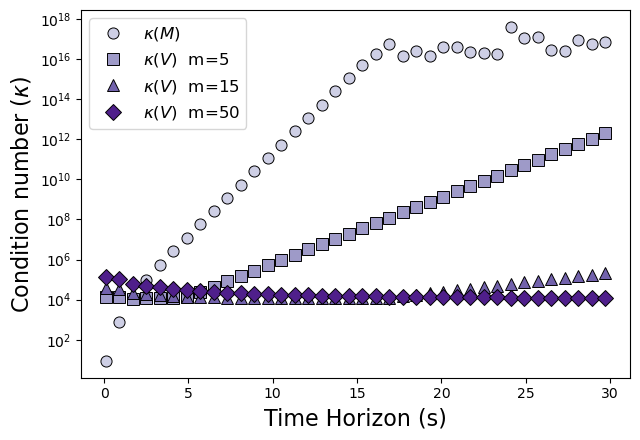

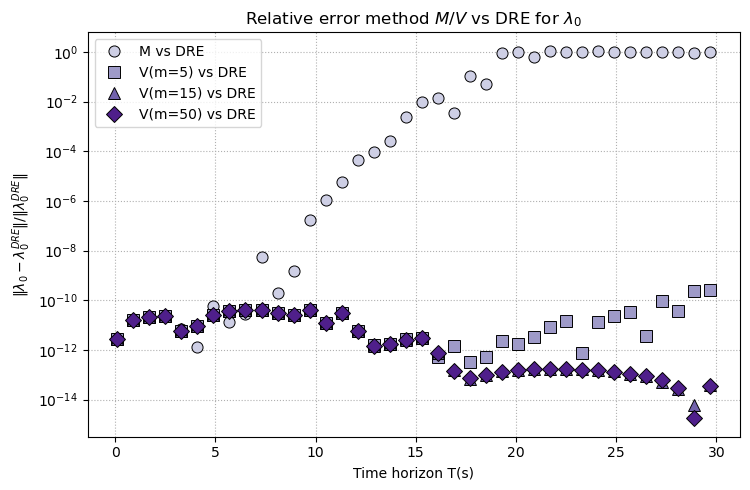

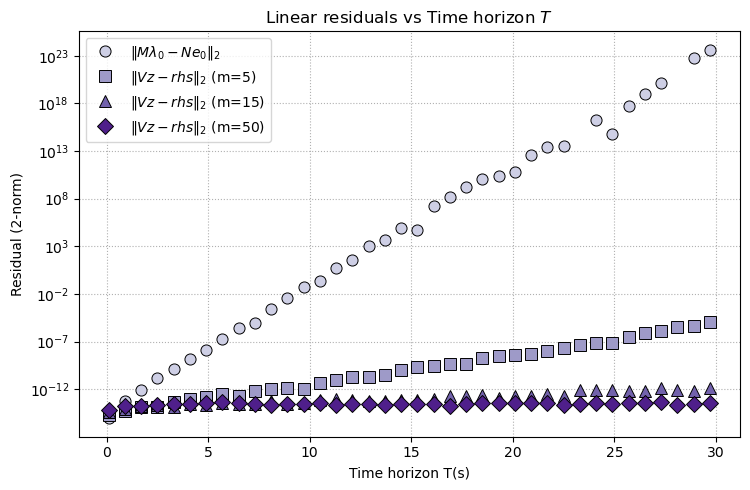

In [6]:

# Condition numbers κ(M) and κ(V)
fig_kappa, ax_kappa = plot_kappa_vs_T(
    out, colors="Purples", 
    hollow=False, edge_black=True
)

# Relative difference of method M/V vs DRE:  ||λ0(method) - λ0_DRE|| / ||λ0_DRE||
fig_dre, ax_dre = plot_rel_lambda0_vs_T_DRE(
    out, colors="Purples",
    hollow=False, edge_black=True
)

# Linear residuals (2-norm) for M and V
figR, axR = plot_residuals2_vs_T(
    out, colors="Purples", 
    hollow=False, edge_black=True
    )


# --------- Save plots ----------
if save_plots:
    out_kappa = FIG_DIR / f"{run_id}_kappa_vs_T.pdf"
    out_dre   = FIG_DIR / f"{run_id}_rel_lambda0_vs_DRE.pdf"
    out_res2  = FIG_DIR / f"{run_id}_residuals2_vs_T.pdf"

    fig_kappa.savefig(out_kappa, dpi=200, bbox_inches="tight")
    fig_dre.savefig(out_dre, dpi=200, bbox_inches="tight")
    figR.savefig(out_res2, dpi=200, bbox_inches="tight")

    generated_files += [out_kappa, out_dre, out_res2]


# --------- Save results (JSON meta + NPZ arrays) ----------
if save_results:
    meta = {
        "run_id": run_id,
        "T_vals": out.T_vals.tolist(),
        "m_grids": sorted(list(out.condV.keys())),
        "condM": out.condM.tolist(),
        "condV": {int(m): out.condV[m].tolist() for m in out.condV},
        "rel_M_vs_DRE": out.rel_M_vs_DRE.tolist(),
        "rel_V_vs_DRE": {int(m): out.rel_V_vs_DRE[m].tolist() for m in out.rel_V_vs_DRE},
        "resM_2": out.resM_2.tolist(),
        "resV_2": {int(m): out.resV_2[m].tolist() for m in out.resV_2},
        # opcional: guarda info extra si existe
        "notes": dict(getattr(out, "meta", {})) if hasattr(out, "meta") else {},
    }

    meta_path = RES_DIR / f"{run_id}_sweep_meta.json"
    save_json(meta_path, meta)
    generated_files.append(meta_path)

    npz_path = RES_DIR / f"{run_id}_sweep_arrays.npz"

    # empaqueta condV/resV2/relVvsDRE en arrays 2D (len(T), len(m))
    m_list = np.array(sorted(out.condV.keys()), dtype=int)
    condV_mat = np.vstack([out.condV[m] for m in m_list]).T          # (nT, nM)
    resV2_mat  = np.vstack([out.resV_2[m] for m in m_list]).T        # (nT, nM)
    relV_mat   = np.vstack([out.rel_V_vs_DRE[m] for m in m_list]).T  # (nT, nM)

    lamb0_M_mat = np.vstack([np.asarray(v).reshape(1, -1) for v in out.lamb0_M])  # (nT, n_state)

    save_dict = {
        "T_vals": out.T_vals,
        "m_grids": m_list,
        "condM": out.condM,
        "condV_mat": condV_mat,
        "rel_M_vs_DRE": out.rel_M_vs_DRE,
        "relV_mat": relV_mat,
        "resM_2": out.resM_2,
        "resV2_mat": resV2_mat,
        "lamb0_M": lamb0_M_mat,
    }

    if hasattr(out, "lamb0_DRE") and out.lamb0_DRE is not None:
        save_dict["lamb0_DRE"] = np.vstack([np.asarray(v).reshape(1, -1) for v in out.lamb0_DRE])

    for m in m_list:
        mat = np.vstack([np.asarray(v).reshape(1, -1) for v in out.lamb0_V[int(m)]])  # (nT, n_state)
        save_dict[f"lamb0_V_m{int(m)}"] = mat

    save_npz(npz_path, **save_dict)
    generated_files.append(npz_path)



## 1.3) Save outputs into a single zip file

In [7]:
zip_path = RES_DIR / f"{run_id}_outputs.zip"

if make_zip:
    with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
        for p in generated_files:
            zf.write(p, arcname=str(p.relative_to(ROOT)))
    print("Created:", zip_path)
    try:
        from IPython.display import FileLink, display
        display(FileLink(str(zip_path)))
    except Exception:
        pass
else:
    print("make_zip=False; skipping zip creation")

print("\nGenerated files:")
for p in generated_files:
    print(" -", p)

make_zip=False; skipping zip creation

Generated files:


---

---

## 2) Vehicle platooning example

### Editable parameters

In [8]:
# --- Type of instance ---
MODEL_NAME = "vehicle_platoon"     

# --- Time horizon and grid ---
T_vals = list(np.arange(0.1, 30, 0.8))
dt = 0.001

# --- Physical and model parameters ---
n   = 5            # number of followers
d   = 5.0          # desired spacing [m]
d0  = 60.0         # initial spacing [m]
tau = 0.5          # actuator lag [s]

# ----------------- Single vehicle model ----------------
A0 = np.array([[0.0, 1.0,      0.0],
               [0.0, 0.0,      1.0],
               [0.0, 0.0, -1.0/tau]], dtype=float)  # (3x3)

b0 = np.array([[0.0],
               [0.0],
               [1.0/tau]], dtype=float)             # (3x1)

# LQR weights (per-vehicle)
Q0 = np.diag([1.0, 1.0, 1.0])   # on [spacing error, rel speed, rel accel]
R0 = np.array([[0.5]])          # scalar input weight (control effort)
# Terminal weight (stacked n-followers)
H = np.eye(3*n)

# ----------------- Stacked n-followers model --------------
# initial absolute states (leader + n followers)  length = n+1
s0 = 300.0
v0 = 7.0

s_abs = s0 - np.arange(0, n+1) * d0      # [s0, s0-d0, s0-2d0, ...]
v_abs = np.full(n+1, v0)
a_abs = np.zeros(n+1)

# ----------------- Leader dynamics (exogenous) ------------------
def u0(t): 
    u0 = 20* np.sin(2*t)                  # leader input can be time dependent!
    return u0               




# --- V method size ---
m_vals = [5, 15, 50] 



# --- Output controls ---
save_plots = True
save_results = False
make_zip = False


In [9]:
def make_model_for_T(T: float):
    return make_vehicle_platoon(n=n, d=d, tau=tau, T=T, dt=dt, 
                         s_abs=s_abs, v_abs=v_abs, a_abs=a_abs, 
                         Q0=Q0, R0=R0, H=H, u0=u0, 
                         integrate_leader=False)

## 2.1) Run swep

In [10]:
out = sweep_MV_over_T(make_model_for_T, T_vals, m_grids=m_vals)

Done T=0.1
Done T=0.9
Done T=1.7
Done T=2.5
Done T=3.3
Done T=4.1
Done T=4.9
Done T=5.7
Done T=6.5
Done T=7.3
Done T=8.1
Done T=8.9
Done T=9.7
Done T=10.5
Done T=11.3
Done T=12.1
Done T=12.9


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.93729e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=13.7


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.75099e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=14.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.21391e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=15.3


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.72125e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=16.1


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.48085e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=16.9


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.06921e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=17.7


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.69014e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=18.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.31976e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=19.3


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.87319e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=20.1


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.52147e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=20.9


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.85746e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=21.7


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.90273e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=22.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.20441e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=23.3


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.11598e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=24.1


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.15588e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=24.9


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.19955e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=25.7


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.30593e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=26.5


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.76139e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=27.3


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.97925e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=28.1


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.41733e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=28.9


c:\tools\anaconda3\envs\tfm_env\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.84368e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Done T=29.7


## 2.2) Plots

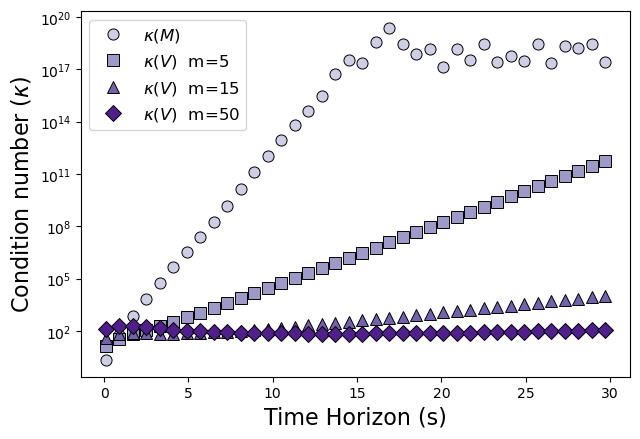

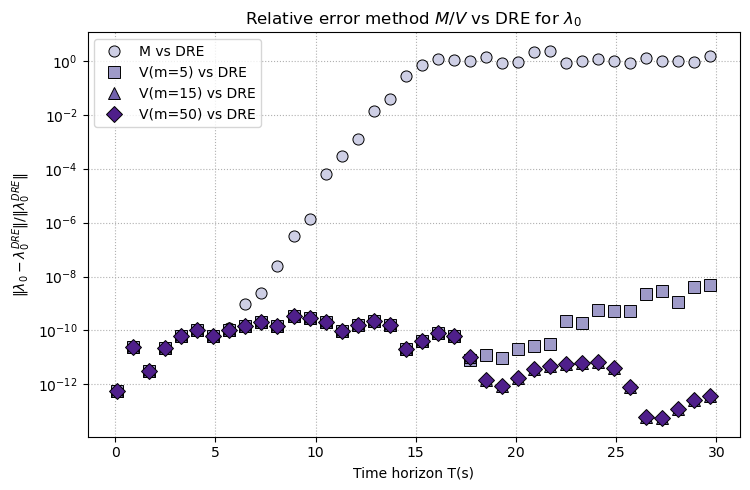

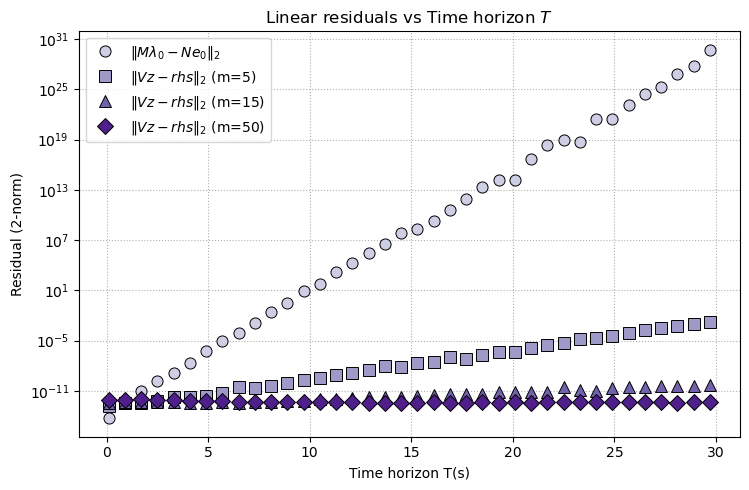

In [11]:
# Condition numbers κ(M) and κ(V)
fig_kappa, ax_kappa = plot_kappa_vs_T(
    out, colors="Purples", 
    hollow=False, edge_black=True
)

# Relative difference of method M/V vs DRE:  ||λ0(method) - λ0_DRE|| / ||λ0_DRE||
fig_dre, ax_dre = plot_rel_lambda0_vs_T_DRE(
    out, colors="Purples",
    hollow=False, edge_black=True
)

# Linear residuals (2-norm) for M and V
figR, axR = plot_residuals2_vs_T(
    out, colors="Purples", 
    hollow=False, edge_black=True
    )


# --------- Save plots ----------
if save_plots:
    out_kappa = FIG_DIR / f"{run_id}_kappa_vs_T.pdf"
    out_dre   = FIG_DIR / f"{run_id}_rel_lambda0_vs_DRE.pdf"
    out_res2  = FIG_DIR / f"{run_id}_residuals2_vs_T.pdf"

    fig_kappa.savefig(out_kappa, dpi=200, bbox_inches="tight")
    fig_dre.savefig(out_dre, dpi=200, bbox_inches="tight")
    figR.savefig(out_res2, dpi=200, bbox_inches="tight")

    generated_files += [out_kappa, out_dre, out_res2]


# --------- Save results (JSON meta + NPZ arrays) ----------
if save_results:
    meta = {
        "run_id": run_id,
        "T_vals": out.T_vals.tolist(),
        "m_grids": sorted(list(out.condV.keys())),
        "condM": out.condM.tolist(),
        "condV": {int(m): out.condV[m].tolist() for m in out.condV},
        "rel_M_vs_DRE": out.rel_M_vs_DRE.tolist(),
        "rel_V_vs_DRE": {int(m): out.rel_V_vs_DRE[m].tolist() for m in out.rel_V_vs_DRE},
        "resM_2": out.resM_2.tolist(),
        "resV_2": {int(m): out.resV_2[m].tolist() for m in out.resV_2},
        # opcional: guarda info extra si existe
        "notes": dict(getattr(out, "meta", {})) if hasattr(out, "meta") else {},
    }

    meta_path = RES_DIR / f"{run_id}_sweep_meta.json"
    save_json(meta_path, meta)
    generated_files.append(meta_path)

    npz_path = RES_DIR / f"{run_id}_sweep_arrays.npz"

    # empaqueta condV/resV2/relVvsDRE en arrays 2D (len(T), len(m))
    m_list = np.array(sorted(out.condV.keys()), dtype=int)
    condV_mat = np.vstack([out.condV[m] for m in m_list]).T          # (nT, nM)
    resV2_mat  = np.vstack([out.resV_2[m] for m in m_list]).T        # (nT, nM)
    relV_mat   = np.vstack([out.rel_V_vs_DRE[m] for m in m_list]).T  # (nT, nM)

    lamb0_M_mat = np.vstack([np.asarray(v).reshape(1, -1) for v in out.lamb0_M])  # (nT, n_state)

    save_dict = {
        "T_vals": out.T_vals,
        "m_grids": m_list,
        "condM": out.condM,
        "condV_mat": condV_mat,
        "rel_M_vs_DRE": out.rel_M_vs_DRE,
        "relV_mat": relV_mat,
        "resM_2": out.resM_2,
        "resV2_mat": resV2_mat,
        "lamb0_M": lamb0_M_mat,
    }

    if hasattr(out, "lamb0_DRE") and out.lamb0_DRE is not None:
        save_dict["lamb0_DRE"] = np.vstack([np.asarray(v).reshape(1, -1) for v in out.lamb0_DRE])

    for m in m_list:
        mat = np.vstack([np.asarray(v).reshape(1, -1) for v in out.lamb0_V[int(m)]])  # (nT, n_state)
        save_dict[f"lamb0_V_m{int(m)}"] = mat

    save_npz(npz_path, **save_dict)
    generated_files.append(npz_path)



## 2.3) Save outputs into a single zip file

In [12]:
zip_path = RES_DIR / f"{run_id}_outputs.zip"

if make_zip:
    with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
        for p in generated_files:
            zf.write(p, arcname=str(p.relative_to(ROOT)))
    print("Created:", zip_path)
    try:
        from IPython.display import FileLink, display
        display(FileLink(str(zip_path)))
    except Exception:
        pass
else:
    print("make_zip=False; skipping zip creation")

print("\nGenerated files:")
for p in generated_files:
    print(" -", p)

make_zip=False; skipping zip creation

Generated files:
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\figures\Conditioning_20260118_013947_833556_kappa_vs_T.pdf
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\figures\Conditioning_20260118_013947_833556_rel_lambda0_vs_DRE.pdf
 - C:\Users\CristinaÁlvarezYuste\OneDrive - Quantum Mads\Documentos\GitHub\Quantum-assisted-Optimal-Control-examples\figures\Conditioning_20260118_013947_833556_residuals2_vs_T.pdf
